# Anayzing the Unemployment Level in the United States, European Area
Team member: Jiahe Wei, Zisong Ma, Zhen Li

In [1]:
import pandas as pd
import os
import warnings
from matplotlib import pyplot as plt
from utils import *
warnings.filterwarnings("ignore")


# Vlidation of Hypothesis 1: The unemployment rate in the United States is independent of Age
## Unemployment Level in the United States
This part is for validating the hypothesis 1 made in previous work using the most up-to-date dataset (till year 2024). <br>
They have the following hypothesis:
**Null Hypothesis: Unemployment rate in the United States is independent of Age
Alternative Hypothesis: Unemployment rate in the United States is NOT independent of Age**

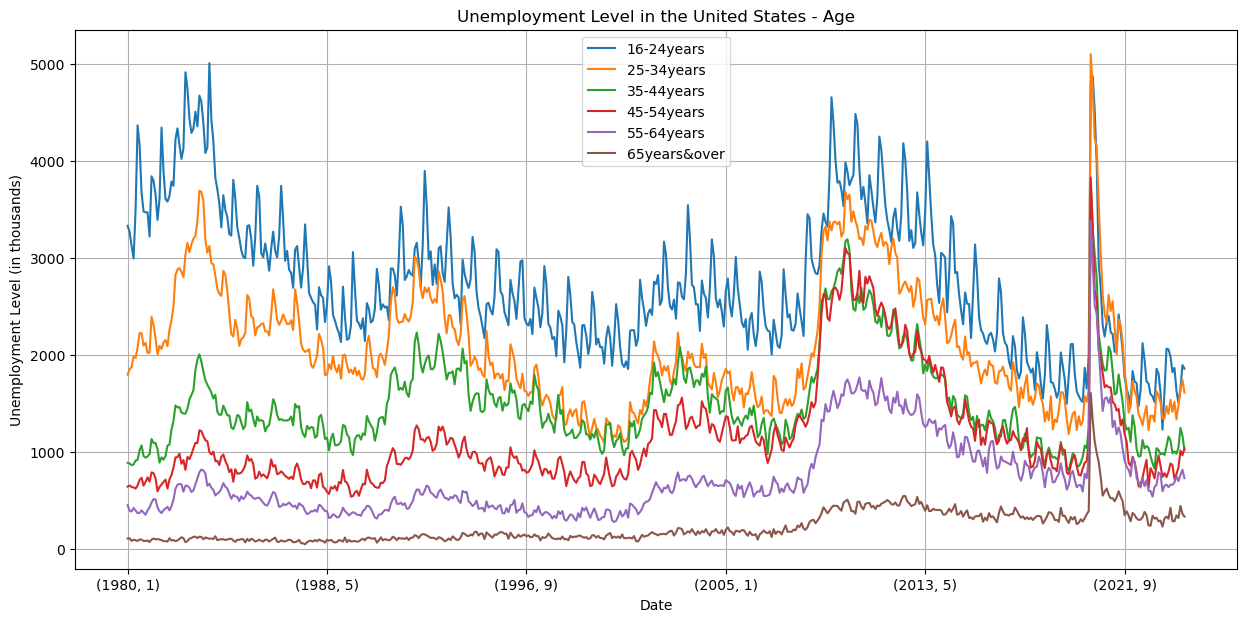

In [2]:
df_age = concatenate_usbls_files(dir_path='./Data/USBLS/Age/', blank_row=11)
df_age.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Level (in thousands)')
plt.title('Unemployment Level in the United States - Age')
plt.show()

## Observation
From the plot derived from most recent dataset, it seemed to validate the conclusion made by previous project:

The conclusion of previous project is that Unemployment rate is highest for the age group 16 to 24 years followed by 25 to 34 years, then 35 to 44 years, then 45 to 54 years, followed by 55 to 64 years, and lastly 65 years and above. Unemployment rate in the United States is not independent of age group. The null hypothesis is rejected.

I assume the conclusion made in previous work is **valid** for now.

# Expansion of Hypothesis 1
## Unemployment Rate in the United States
For the expansion of the hypothesis 1, I will first analyze the unemployment rate of the United States. 
Since the previous work was performed on the unemployment level dataset which represents the change of number of unemployed people, but there is no visualization of the proportion of unemployed people in the total population. Therefore, I will perform analyze on the unemployment rate dataset which represents the proportion of unemployed people in the total population.

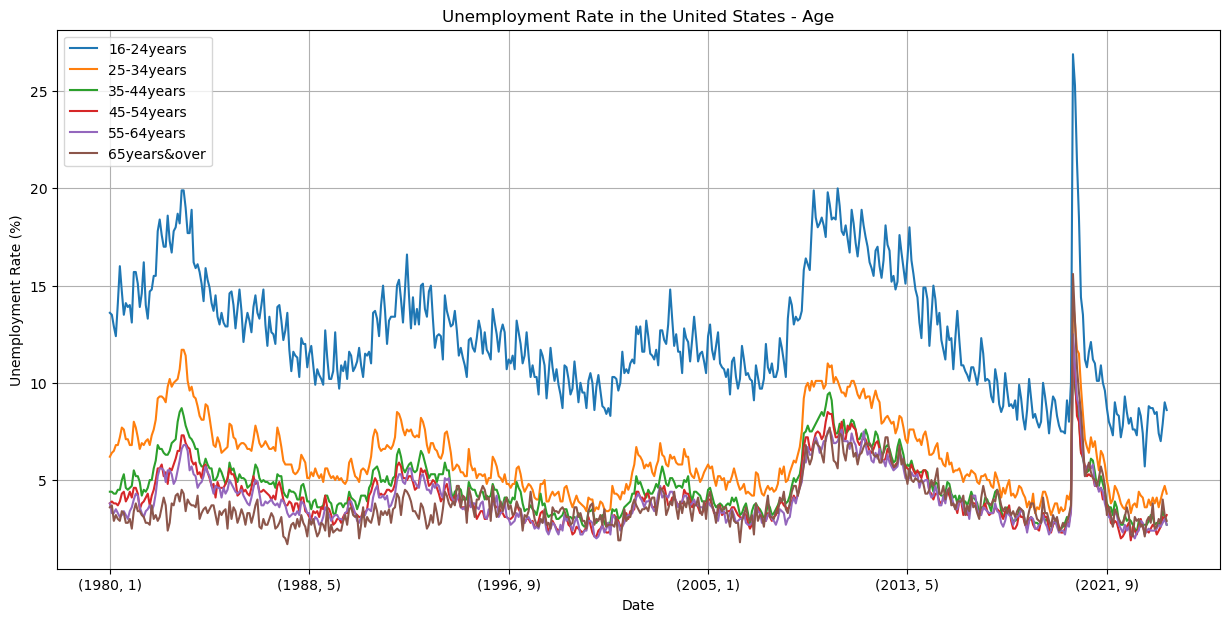

In [3]:
df_age_by_rate = concatenate_usbls_files(dir_path='./Data/USBLS/Age(byRate)/', blank_row=11)
df_age_by_rate.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in the United States - Age')
plt.show()

## Observation
Above is the plot derived from the unemployment rate associated with age groups.

If we compare with the plot derived from unemployment level associated with age groups, we can see there are differences. Although the age group '16-24' years still shows a high value in both unemployment level and unemployment rate, the other groups does not show a clear trend that the unemployment rate is inversely proportional to the age group. Most of the lines are pretty close, or even intersect multiple times at some time point.

Therefore, this is a **weakness** of the previous analysis. The majority reason of causing this weakness is that their hypothesis is not based on precisely matched dataset. Overall, the  conclusion unemployment rate is not independent of age is still **valid** since we can see from the '16-24' age groups.

# Expansion of Hypothesis 1 (Continue)
## Unemployment Rate in the European Union
This part is to check whether the unemployment rate in the European Union is independent on the Age of individuals.

We have the following hypothesis:
**Null Hypothesis: Unemployment rate in the European Union is independent of Age.
Alternative Hypothesis: Unemployment rate in the European Union is NOT independent of Age.**

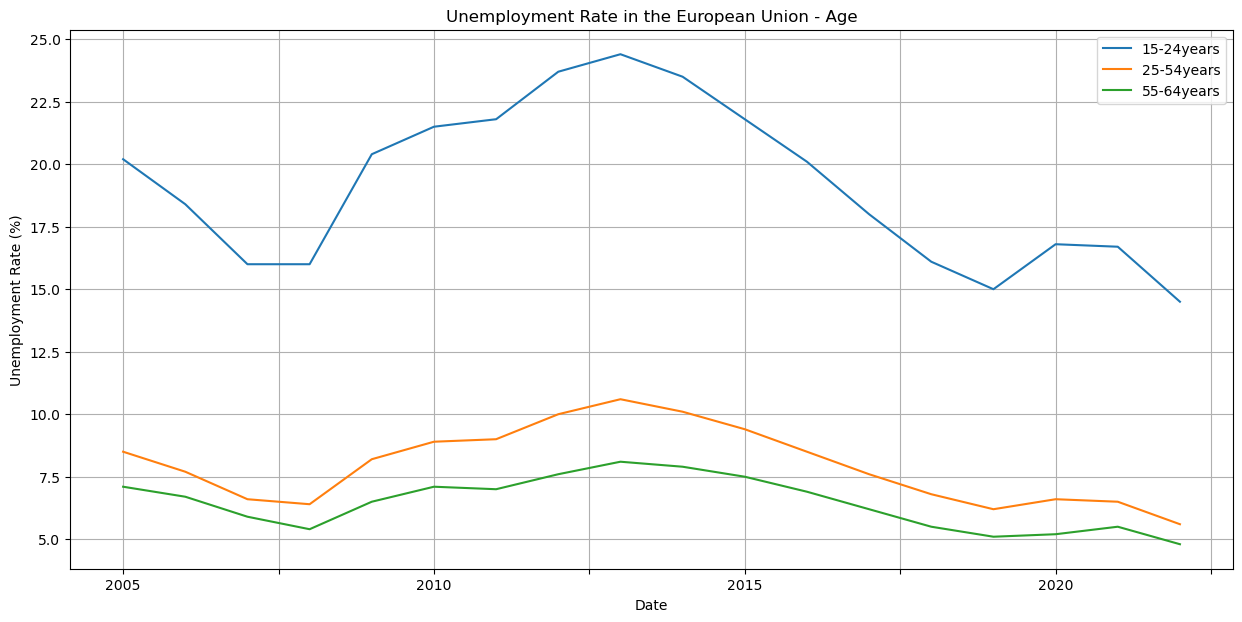

In [4]:
df_eu_age = merge_eurostat_data('./Data/Eurostat/Age/')
df_eu_age.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in the European Union - Age')
plt.show()

## Observation:
* From the plot derived from the unemployment rate associated with age groups in the European Union, we can see that the unemployment rate is not independent of age group. The age group '15-24' years shows a high value in unemployment rate, which is similar to the United States. the other age groups also show a similar trend that the unemployment rate is inversely proportional to the age group. 

* **Conclusion:** the unemployment rate in the European Union is not independent of age group. The null hypothesis is rejected.  

* **Deficiencies Shortcomings:** The dataset I found don't have more detailed age groups, also the time duration of data is annually instead of monthly. Which may cause the conclusion not precise enough.

# Vlidation of Hypothesis 2: The unemployment rate in the United States is Independent of Race
This part is for validating the hypothesis 2 made in previous work using the most up-to-date dataset (till year 2024). <br>
They have the following hypothesis:

**Null Hypothesis: Unemployment rate in the United States is independent of Race <br>
Alternative Hypothesis: Unemployment rate in the United States is NOT independent of Race**

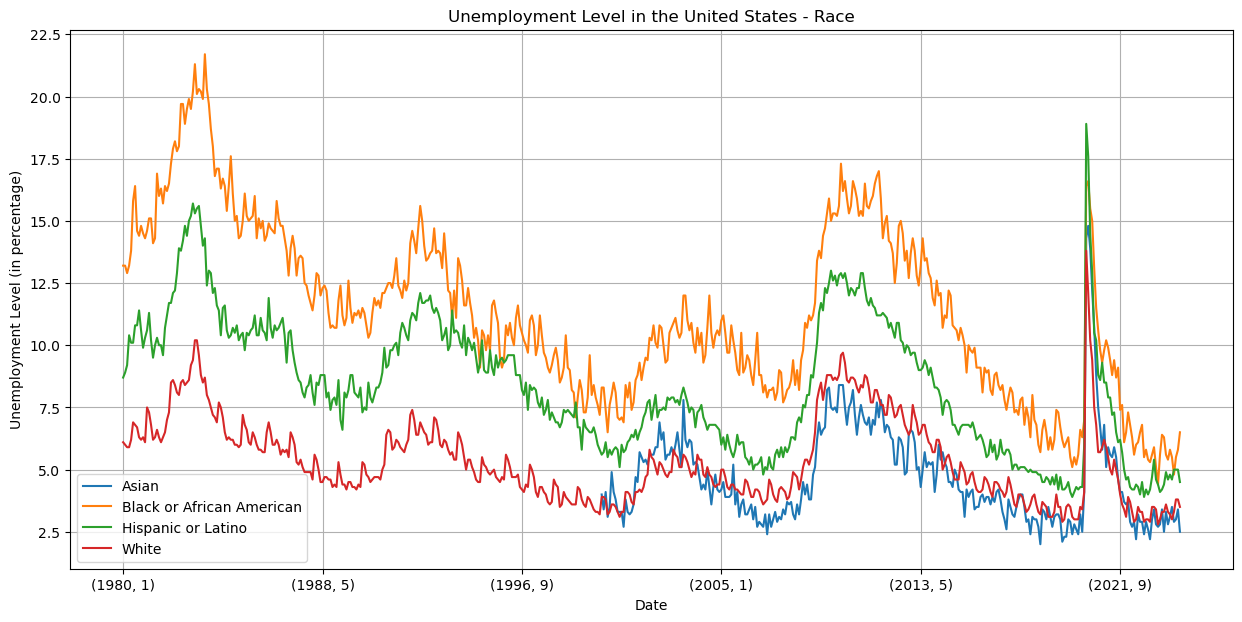

In [8]:
df_race = concatenate_usbls_files(dir_path='./Data/USBLS/Race/', blank_row=12, year_range=(1980, 2024))
df_race.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Level (in percentage)')
plt.title('Unemployment Level in the United States - Race')
plt.show()

## Observation

The plot shows unemployment rate is highest for Black Americans followed by Hispanic or Latino then White and then Asians. 

Therefore, we can unemployment rate is not independent of race, the conclusion made in previous work is **valid** for now.

One particular detail I could see from here is that, no matter what race group, the unemployment rate almost drop to the lowest point after the end of COVID-19 pandemic, compared to previous 40 years. The reason might be thanks to the recover of economic after pandemic, which is a notable observation.

# Expansion of Hypothesis 2:
## Unemployment Rate in the U.K.

This part is to check whether the unemployment rate in the United Kingdom is independent on the Race of individuals.

We have the following hypothesis:
**Null Hypothesis: Unemployment rate in the United Kingdom is independent of Race.
Alternative Hypothesis: Unemployment rate in the United Kingdom is NOT independent of Race.**

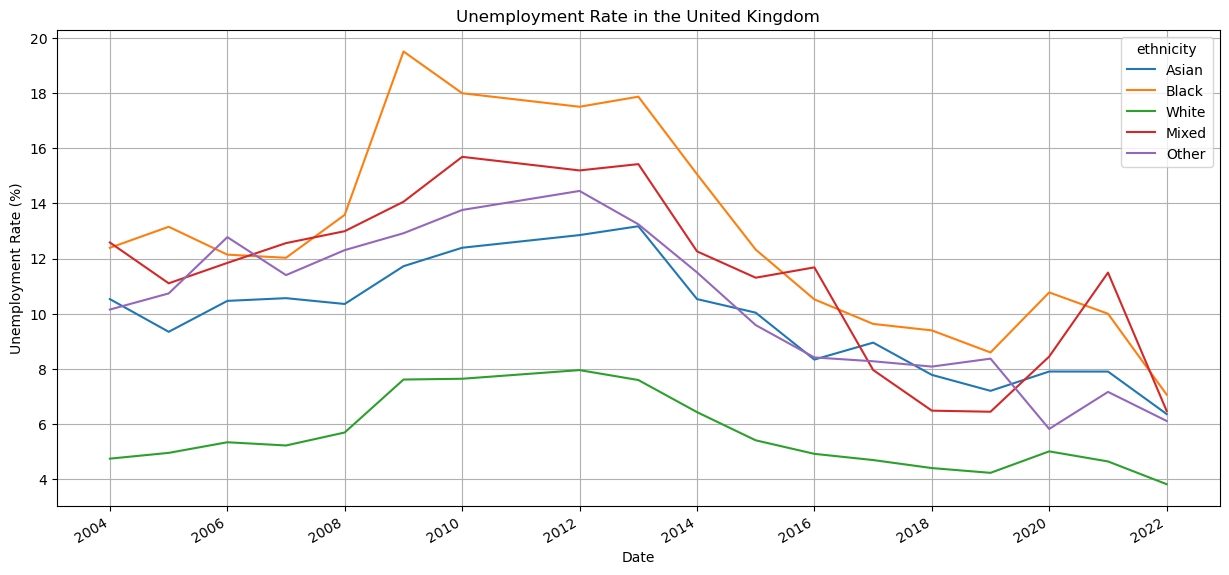

In [27]:
df_uk = pd.read_csv('./Data/OnsGovUK/unemployment-by-region-2022.csv')
df_uk['time'] = pd.to_datetime(df_uk['time'].str.split('-').str[0], format='%b%Y')  # Extract the month and year
# Ensure the 'value' column is numeric
df_uk['value'] = pd.to_numeric(df_uk['value'], errors='coerce')
# Group the data by 'time' and 'ethnicity', and calculate the average unemployment rate of different geographic regions
average_unemployment_by_race = df_uk.groupby(['time', 'ethnicity'])['value'].mean().reset_index()
# Pivot the table again to get the desired format with 'time' as the index
average_unemployment_by_race = average_unemployment_by_race.pivot_table(index='time', columns='ethnicity', values='value')
average_unemployment_by_race = average_unemployment_by_race.filter(items=['Asian', 'Black', 'White', 'Mixed', 'Other'])
average_unemployment_by_race = average_unemployment_by_race.dropna(how='all')
average_unemployment_by_race.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in the United Kingdom')
plt.show()

## Observation
The plot shows unemployment rate is always low for White. In most of the time, Black holds the highest unemployment rate among those groups.

Therefore, we can say unemployment rate is not independent of race in the United Kingdom, the **null hypothesis is rejected**. The trend we observed is similar to the United States.

Deficiencies Shortcomings: 
* Obtaining monthly data on the unemployment rate by race or ethnicity for European Union countries is more challenging due to differing policies on racial and ethnic data collection across EU member states. Many European countries have restrictions or do not collect data on race/ethnicity due to historical, ethical, and legal reasons. So I have to use the data from the UK only. 
* The dataset I found only contains the data start from 2004 which is comparably short with the dataset for the United States.

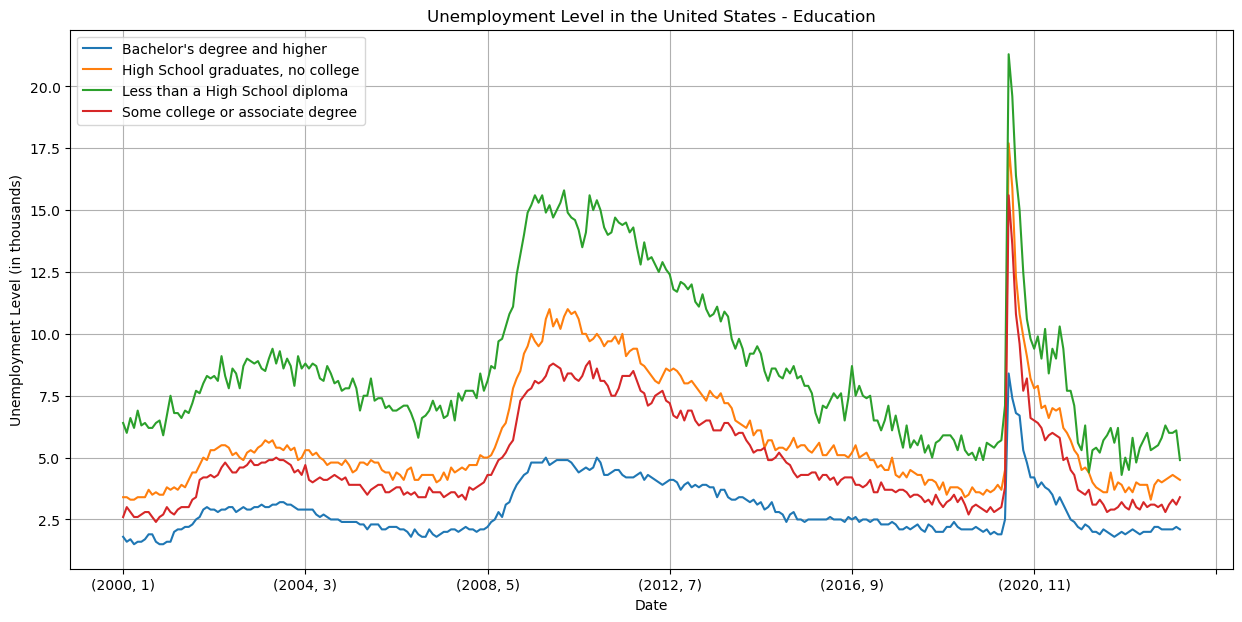

In [6]:
df_age = concatenate_usbls_files(dir_path='./Data/USBLS/Education/', blank_row=12, year_range=(2000, 2024))
df_age.plot(figsize=(15, 7), linewidth = 1.5)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment Level (in thousands)')
plt.title('Unemployment Level in the United States - Education')
plt.show()

In [7]:
df = read_excel_data('./Data/USBLS/Race','Black or African American.xlsx', blank_row=12) 
df
# print(df
# .columns)

NameError: name 'read_excel_data' is not defined

In [ ]:
df = concatenate_usbls_files(dir_path='./Data/USBLS/Race', blank_row=12)
df